# Model Evaluation & Fitting
## Predicting Boston Housing Prices

In [1]:
# import libraries  here
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## 1- Data Exploration
 

### Import and explore the data. Clean the data for outliers and missing values. 

Download the Boston dataset from [here](https://drive.google.com/file/d/1Bux3hwVYr6BuFbdUIK2db1lOY6EqghfD/view?usp=sharing) , place it in the data folder and import it as dataframe. **The features in the dataset are described [here](https://www.kaggle.com/prasadperera/the-boston-housing-dataset)** 
<br> Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict. 

In [2]:
#your code here
Boston=pd.read_csv('Boston.csv')
Boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#features description
#CRIM - per capita crime rate by town
#ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
#INDUS - proportion of non-retail business acres per town.
#CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
#NOX - nitric oxides concentration (parts per 10 million)
#RM - average number of rooms per dwelling
#AGE - proportion of owner-occupied units built prior to 1940
#DIS - weighted distances to five Boston employment centres
#RAD - index of accessibility to radial highways
#TAX - full-value property-tax rate per 10,000 dollars
#PTRATIO - pupil-teacher ratio by town
#B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#LSTAT - percentage lower status of the population
#MEDV - Median value of owner-occupied homes in 1000's dollars

In [3]:
Boston.isna().sum() 

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [4]:
Boston.dtypes

Unnamed: 0      int64
crim          float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
age           float64
dis           float64
rad             int64
tax             int64
ptratio       float64
black         float64
lstat         float64
medv          float64
dtype: object

In [5]:
Boston.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
Boston['crim'].nlargest(10)

380    88.9762
418    73.5341
405    67.9208
410    51.1358
414    45.7461
404    41.5292
398    38.3518
427    37.6619
413    28.6558
417    25.9406
Name: crim, dtype: float64

### Next, we want to explore the data. Pick several variables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

#your code here
#I was thinking crime rate per capita, average number of rooms, distances to employment centres and highways, as well as status of population should have some type of correlation with the house prices
#CRIM - per capita crime rate by town
#RM - average number of rooms per dwelling
#DIS - weighted distances to five Boston employment centres
#RAD - index of accessibility to radial highways
#LSTAT - % lower status of the population

In [7]:
correlation_Boston = Boston.corr()
correlation_Boston

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


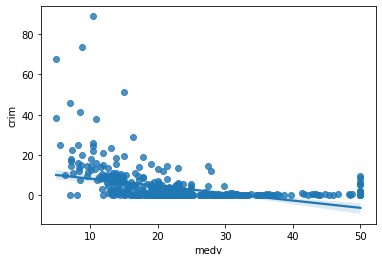

In [8]:
# Your plots here
sns.regplot(data=Boston, x="medv", y="crim")
#The negative correlation is quite weak

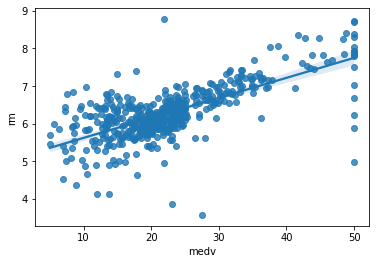

In [9]:
sns.regplot(data=Boston, x="medv", y="rm")
#The positive correlation is quite strong in the case of number of rooms

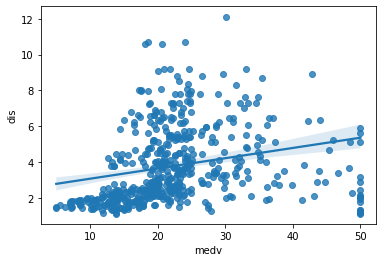

In [10]:
sns.regplot(data=Boston, x="medv", y="dis")
#very weak positive correlation between distance to employment centers and the value

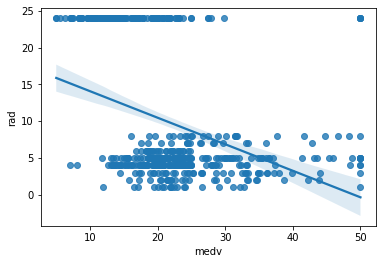

In [11]:
sns.regplot(data=Boston, x="medv", y="rad")
#very weak negative correlation between distance to highways and value

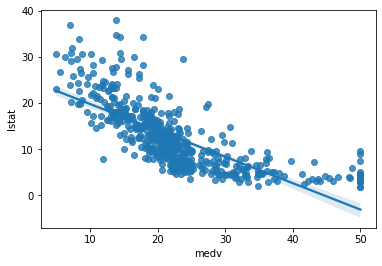

In [12]:
sns.regplot(data=Boston, x="medv", y="lstat")
#quite strong negative correlation between population status and value (the more lower population status (poorer neighorhoods), the less value for the houses)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables? 
- Reference: https://www.kaggle.com/c/boston-housing

In [13]:
### Your response here
#The only strong correlations are related to number of rooms (positive) and population status (negative). the rest of the correlations are quite weak.
# I would have expected the crime rate per capita to have a stronger correlation (considering that safety would be an important factor in the decision making when buying property)

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

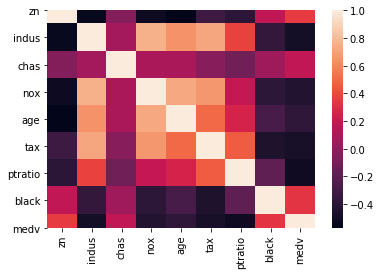

In [14]:
#your code here
Boston_remaining=Boston[['zn','indus','chas','nox','age','tax','ptratio','black','medv']]
corr = Boston_remaining.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#### Significant correlations


In [15]:
#your code here
#There are no new variables that have high correlation that were not already checked before

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [16]:
# Your code here
Boston['medv'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## 2- Developing a Model

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [17]:
#your code here
y = Boston["medv"]
X = Boston.drop(columns="medv")
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
#shufflebool, default=True
#Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.
#The data should be shuffled by default

----

## 3- Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [33]:
#your code here
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
regr2 = RandomForestRegressor(max_depth=2, random_state=0)
regr2.fit(X_train,y_train)
regr4 = RandomForestRegressor(max_depth=4, random_state=0)
regr4.fit(X_train,y_train)
regr6 = RandomForestRegressor(max_depth=6, random_state=0)
regr6.fit(X_train,y_train)
regr8 = RandomForestRegressor(max_depth=8, random_state=0)
regr8.fit(X_train,y_train)
regr10 = RandomForestRegressor(max_depth=10, random_state=0)
regr10.fit(X_train,y_train)

C:\Users\Merti\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Merti\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Merti\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Merti\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Merti\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

Now, plot the score for each tree on the training set and on the testing set.

In [34]:
# Produce a plot with the score for the testing and training for the different max depths
#your code here
y_pred2 = regr2.predict(X_test)
y_pred4 = regr4.predict(X_test)
y_pred6 = regr6.predict(X_test)
y_pred8 = regr8.predict(X_test)
y_pred10 = regr10.predict(X_test)

y_pred2_train= regr2.predict(X_train)
y_pred4_train = regr4.predict(X_train)
y_pred6_train = regr6.predict(X_train)
y_pred8_train = regr8.predict(X_train)
y_pred10_train = regr10.predict(X_train)

What do these results tell you about the effect of the depth of the trees on the performance of the model?


In [36]:
# Your response here
#R2 scores are better the higher the depth of the trees (so with depth 10 the r2 score is the highest)
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
#testing
print(r2_score(y_test,y_pred2))
print(r2_score(y_test,y_pred4))
print(r2_score(y_test,y_pred6))
print(r2_score(y_test,y_pred8))
print(r2_score(y_test,y_pred10))
#training
print(r2_score(y_train,y_pred2_train))
print(r2_score(y_train,y_pred4_train))
print(r2_score(y_train,y_pred6_train))
print(r2_score(y_train,y_pred8_train))
print(r2_score(y_train,y_pred10_train))

0.8103362240303458
0.8846992210406759
0.892429156380421
0.8929992497419756
0.8842611882981637
0.7622310174399441
0.9121393168933609
0.9522027066589281
0.9689801600311941
0.9734497043890782


### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [25]:
# Your response here
#The closer R2 score to 1 the higher the variance, so in this case higher bias and lower variance are visible at lower depths (like 2), while lower bias and higher variance are visible at higher depths (like 10)

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Based on your previous results run your model and explain its performance.

In [39]:
regr12 = RandomForestRegressor(max_depth=12, random_state=0)
regr12.fit(X_train,y_train)
y_pred12 = regr12.predict(X_test)
y_pred12_train= regr12.predict(X_train)
print(r2_score(y_test,y_pred12))
print(r2_score(y_train,y_pred12_train))

0.8930750134717106
0.9774997255249719


C:\Users\Merti\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
regr20 = RandomForestRegressor(max_depth=20, random_state=0)
regr20.fit(X_train,y_train)
y_pred20 = regr20.predict(X_test)
y_pred20_train= regr20.predict(X_train)
print(r2_score(y_test,y_pred20))
print(r2_score(y_train,y_pred20_train))

0.8837792383535445
0.9766237296621796


C:\Users\Merti\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Train the Random forest regressor model with the optimal value for max_depth

In [26]:
#your code here
#I have tried 2 more depths, on 12 and 20 and the results are not much better than with 10, so my idea is that depth 10 is the best one to use

#### Use the mean absolute error (MAE) to calculate the performance of the model

In [42]:
#your code here
MAE = mean_absolute_error(y_test,y_pred10)
print(MAE)

2.0861969158984066


#### Use the root mean squared error (RMSE) to calculate the performance of the model

In [43]:
#your code here
MSE = mean_squared_error(y_test,y_pred10)
RMSE = np.sqrt(MSE)
print(RMSE)

2.845145148814363


#### Create a function that calculates  and returns the r2 score as performance metric

In [29]:
#your code here

#### Calculate the r2 score of the model using the function defined above

In [44]:
#your code here
r2_score(y_test,y_pred10)

0.8842611882981637

#### Bonus question
Read [this article](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) 
about the differences between MAE and RMSE. Do you think that one of the two types of error is more appropriate for this problem, and why?

In [31]:
#your answer here

### 4 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [32]:
#Your response here
#I think the answers to all these questions are no, since data collected in 1978 is barely relevant today (different market forces, different additional variables appeared in the meantime), the features present in the dataset are not sufficient to describe a home, the model is robust enough to make consistent predictions but only for the 1978 period, so the outcomes will not be relevant for the present time. And the data collected in urban city might have differences compared to rural city, so we would have to take a look at a rural city dataset and do the same exercise to understand if there are any particularities